## 0) Loading Data

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, tree
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split


#Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

X = df.drop('class', axis=1)
y = df['class']

## Exercise 1

/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

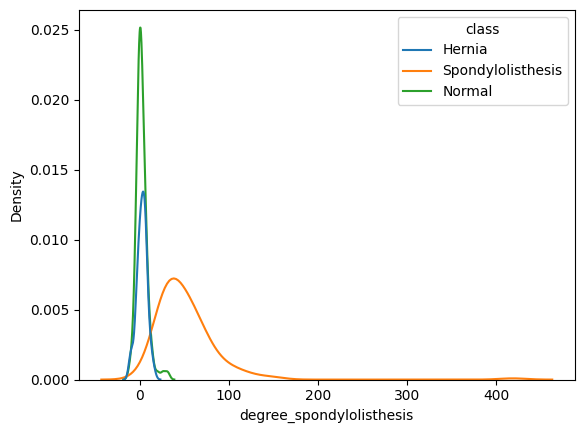

/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

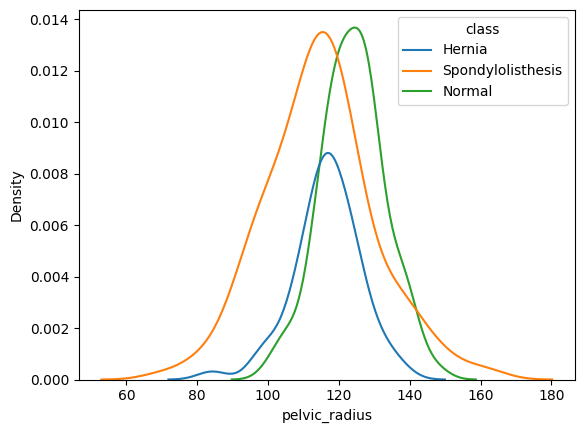

In [224]:
f_score, f_pvalues = f_classif(X, y)

data_tb = {'F-score': f_score, 'p-values': f_pvalues}
tb = pd.DataFrame(data_tb)

#Input variable w/ highest discriminative power: degree_spondylolisthesis
#Input variable w/ lowest discriminative power: pelvic_radius

sns.kdeplot(data=df, x='degree_spondylolisthesis', hue='class')
plt.show()

sns.kdeplot(data=df, x='pelvic_radius', hue='class')
plt.show()

The degree_spondylolisthesis input variable is the one that has the most discriminative power out of the 6 and pelvic_tilt is the one with less discriminative power

## Exercise 2

/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/joselopes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

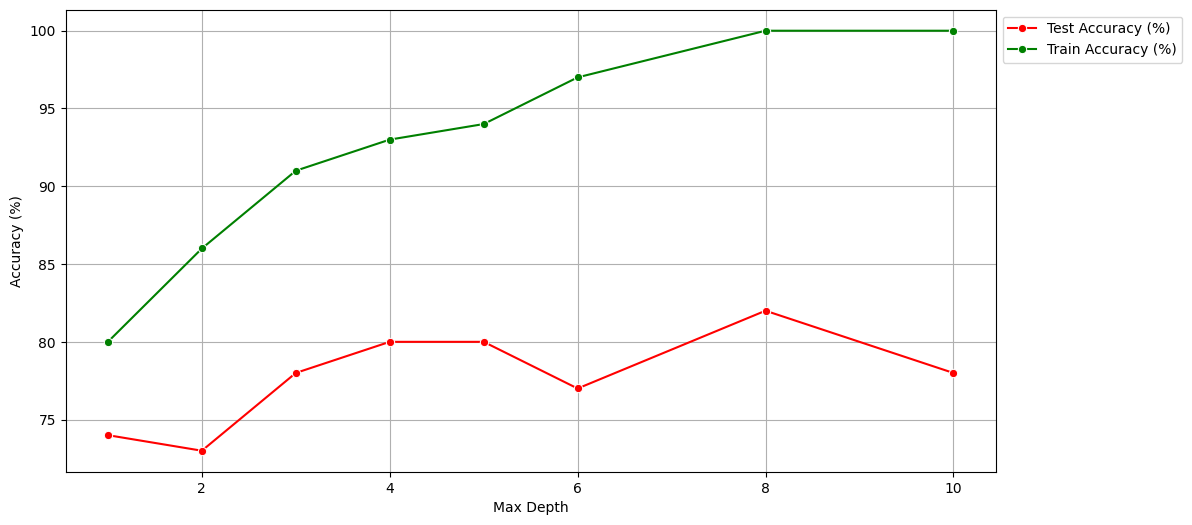

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
depth_values = [1, 2, 3, 4, 5, 6, 8, 10]
df_data = []

for depth_value in depth_values:
    predictor = tree.DecisionTreeClassifier(max_depth=depth_value, random_state=0)
    predictor.fit(X_train, y_train)
    y_test_pred = predictor.predict(X_test)
    y_train_pred = predictor.predict(X_train)
    test_accuracy = round(metrics.accuracy_score(y_test, y_test_pred), 2) * 100
    train_accuracy = round(metrics.accuracy_score(y_train, y_train_pred), 2) * 100
    df_data.append({"Max Depth": depth_value, "Test Accuracy (%)": test_accuracy, "Train Accuracy (%)": train_accuracy})

df = pd.DataFrame(df_data, columns=["Max Depth", "Test Accuracy (%)", "Train Accuracy (%)"])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Max Depth', y="Test Accuracy (%)", label="Test Accuracy (%)", data=df, color='r', marker='o')
sns.lineplot(x='Max Depth', y="Train Accuracy (%)", label="Train Accuracy (%)", data=df, color='g', marker='o')
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.grid()

## Exercise 3

- As we can see the train accuracy is substantially higher than the test accuracy, ending up at 100% with a depth limit of 8, this might mean that our decision tree model is overfitted for our specific parameters.
- Although this is true, we can also see that as max depth grows, so does the accuracy of both the training set and the test set, meaning the generalization capacity across the multiple depth limit settings increases as the depth limit also increases.

## Exercise 4

[]

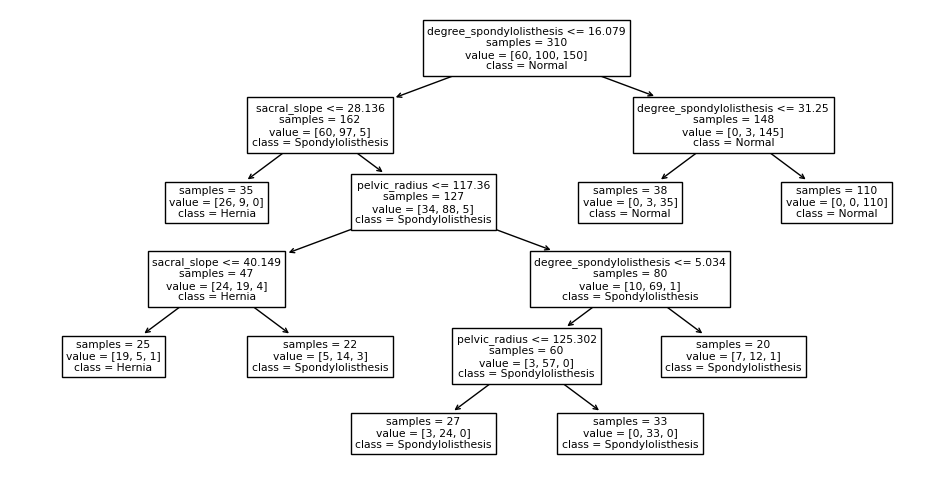

In [213]:
X_train = X
y_train = y

predictor = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
predictor.fit(X_train, y_train)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"], class_names=["Hernia", "Spondylolisthesis", "Normal"], impurity=False)
plt.plot()